# Amazon Employee Access:

When an employee at any company starts work, they first need to obtain the computer access necessary to fulfill their role. This access may allow an employee to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. It is often the case that employees figure out the access they need as they encounter roadblocks during their daily work (e.g. not able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the needed access in order to overcome access obstacles. As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.

There is a considerable amount of data regarding an employee’s role within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize the human involvement required to grant or revoke employee access.



# Objective
The objective of this competition is to build a model that will learn using historical data, that will determine an employee’s access needs, such that manual access transactions (grants and revokes) are minimized as the employee’s attributes change over time. The model will take an employee’s role information and a resource code and will return whether or not access should be granted.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Importing the data. The data contains Action, Resource Id and the details of 
#the role of the employee. Train and test datasets. 
df_train = pd.read_csv('train.csv', sep=',')


In [7]:
df_test = pd.read_csv('test.csv', sep=',')


In [10]:
df_train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


# Exploratory Data Analysis

In [12]:
df_train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [13]:
df_train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


<AxesSubplot:>

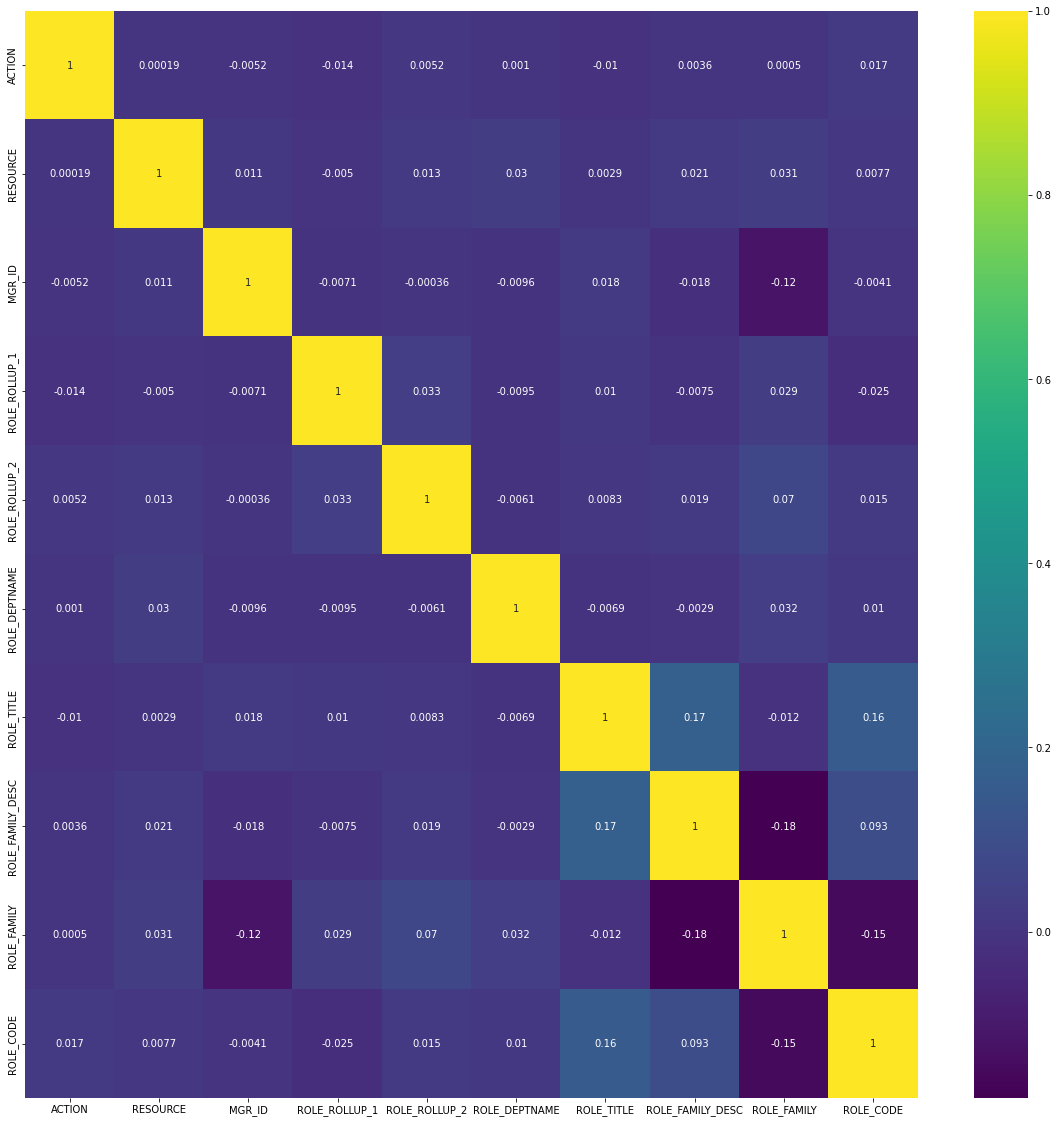

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, vmax=1, cmap='viridis')#, kind='kde')

In [19]:
df_train.shape, df_test.shape

((32769, 10), (58921, 10))

In [20]:
!pip install catboost

In [21]:
df_train.apply(lambda x: x.nunique())

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

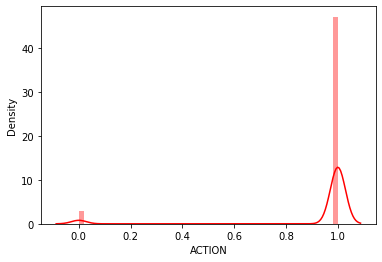

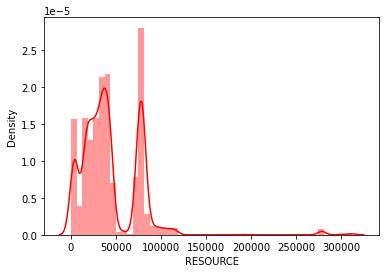

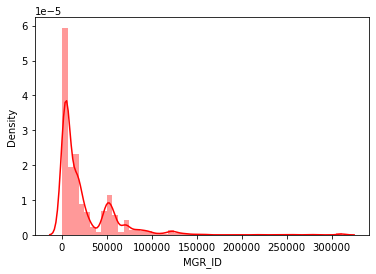

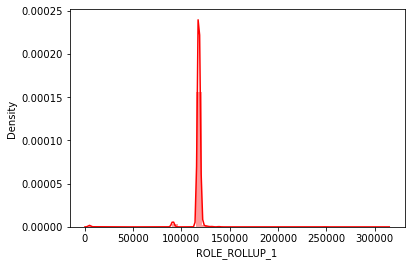

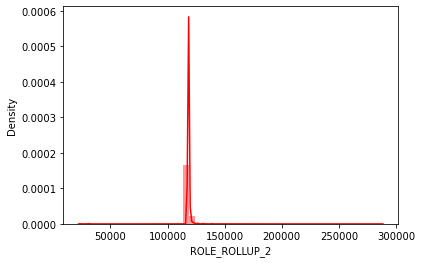

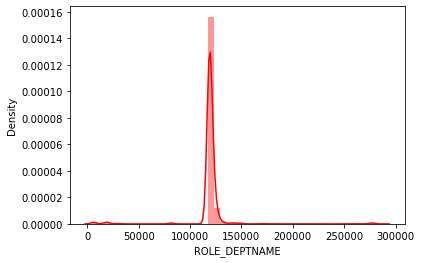

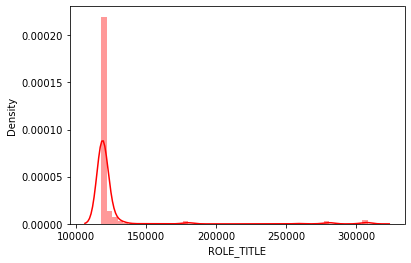

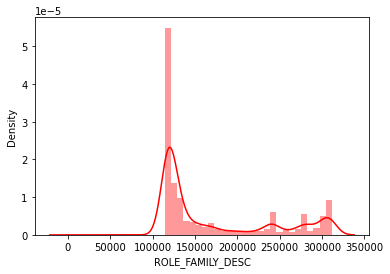

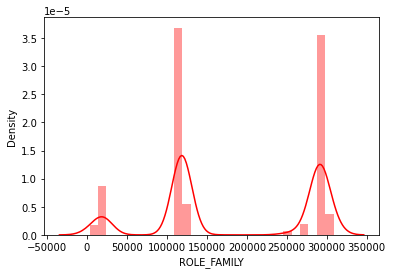

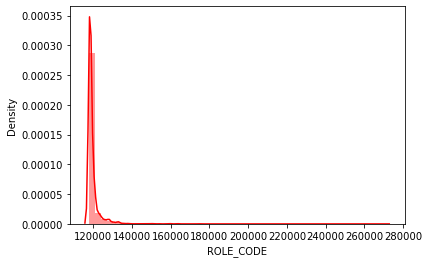

In [28]:
import warnings
warnings.filterwarnings('ignore')
for col in df_train.describe().columns:
    sns.distplot(df_train[col].dropna(), color='red');
    plt.show();

In [27]:
df_train.ACTION.value_counts(normalize=True)

1    0.94211
0    0.05789
Name: ACTION, dtype: float64

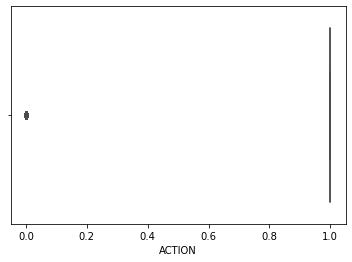

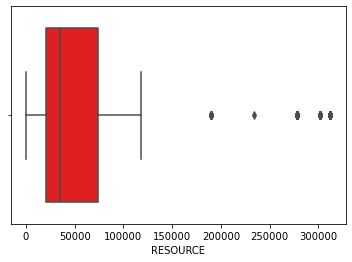

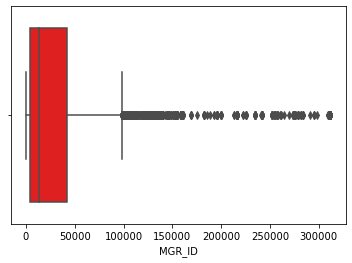

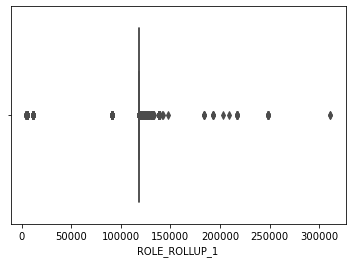

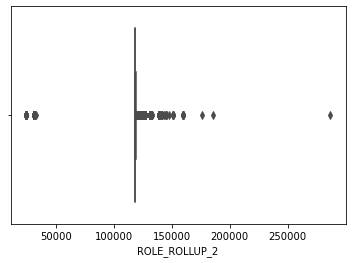

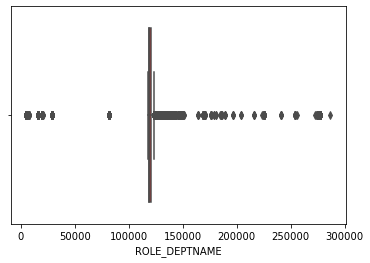

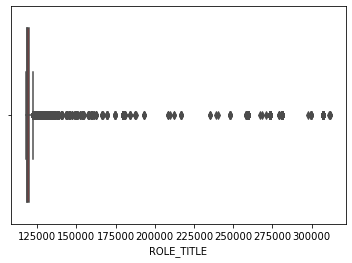

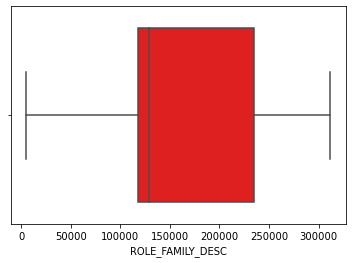

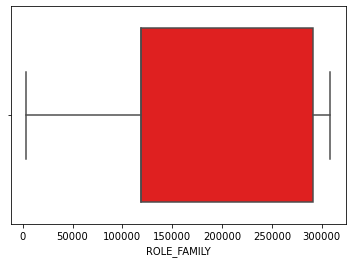

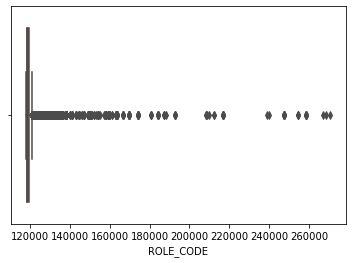

In [30]:
for col in df_train.columns:
    sns.boxplot(df_train[col], color='red')
    plt.show()

In [31]:
#The data is widely distributed. And are right skewed. 

In [ ]:
Model Building:

In [33]:
X = df_train.drop('ACTION', axis=1)
y = df_train.ACTION
X_valid = df_test.drop('id', axis=1)
#In test data set there is a additional column id used for the purpose of submission.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [35]:
from catboost import CatBoostClassifier


In [47]:
%%time
param_grid = {'loss_function':'Logloss',
              'eval_metric':'AUC',
              'verbose':200,
              'random_seed':1
}

catboost_model = CatBoostClassifier(**param_grid)
catboost_model.fit(X_train, y_train,
                  eval_set = (X_test, y_test),
                  use_best_model=True)


Learning rate set to 0.071005
0:	test: 0.5669798	best: 0.5669798 (0)	total: 20.4ms	remaining: 20.4s
200:	test: 0.7750556	best: 0.7750556 (200)	total: 1.75s	remaining: 6.97s
400:	test: 0.7908761	best: 0.7908761 (400)	total: 3.57s	remaining: 5.33s
600:	test: 0.7992739	best: 0.7994630 (594)	total: 5.32s	remaining: 3.53s
800:	test: 0.8030459	best: 0.8037200 (753)	total: 7.03s	remaining: 1.75s
999:	test: 0.8070809	best: 0.8070809 (999)	total: 8.84s	remaining: 0us

bestTest = 0.8070808821
bestIteration = 999

Wall time: 9.41 s


In [ ]:
#Since the catboost model treated the dataset as numerical, we need to specify the 
#categorical features manually. 

In [39]:
X.shape

(32769, 9)

In [43]:
cat_features = list(range(X.shape[1]))#All the columns are categorical, we are considering all of them. 

In [46]:
%%time
param_grid1 = {'loss_function':'Logloss',
              'eval_metric':'AUC',
              'verbose':200,
              'cat_features':cat_features,
              'random_seed':1
}

catboost_model1 = CatBoostClassifier(**param_grid1)
catboost_model1.fit(X_train, y_train,
                  eval_set = (X_test, y_test),
                  use_best_model=True)

Learning rate set to 0.071005
0:	test: 0.5098012	best: 0.5098012 (0)	total: 40.6ms	remaining: 40.6s
200:	test: 0.8665347	best: 0.8665396 (198)	total: 15.9s	remaining: 1m 3s
400:	test: 0.8690688	best: 0.8690737 (384)	total: 32.3s	remaining: 48.3s
600:	test: 0.8697803	best: 0.8700055 (538)	total: 48.6s	remaining: 32.3s
800:	test: 0.8714543	best: 0.8715638 (798)	total: 1m 4s	remaining: 16.1s
999:	test: 0.8702965	best: 0.8715638 (798)	total: 1m 21s	remaining: 0us

bestTest = 0.8715637602
bestIteration = 798

Shrink model to first 799 iterations.
Wall time: 1min 22s


In [55]:
#After converting them to categorical, the accuracy has improved a lot. 
#Checking the contribution percentage of each features on the dependant variable.

feature_imp = catboost_model1.get_feature_importance(prettified=True)
feature_imp


,Feature Id,Importances
0,ROLE_DEPTNAME,18.852258
1,RESOURCE,16.783127
2,MGR_ID,16.197617
3,ROLE_ROLLUP_2,11.888189
4,ROLE_FAMILY_DESC,9.759672
5,ROLE_ROLLUP_1,7.054296
6,ROLE_CODE,7.003920
7,ROLE_FAMILY,6.994789
8,ROLE_TITLE,5.466130


Text(0.5, 1.0, 'Feature importance')

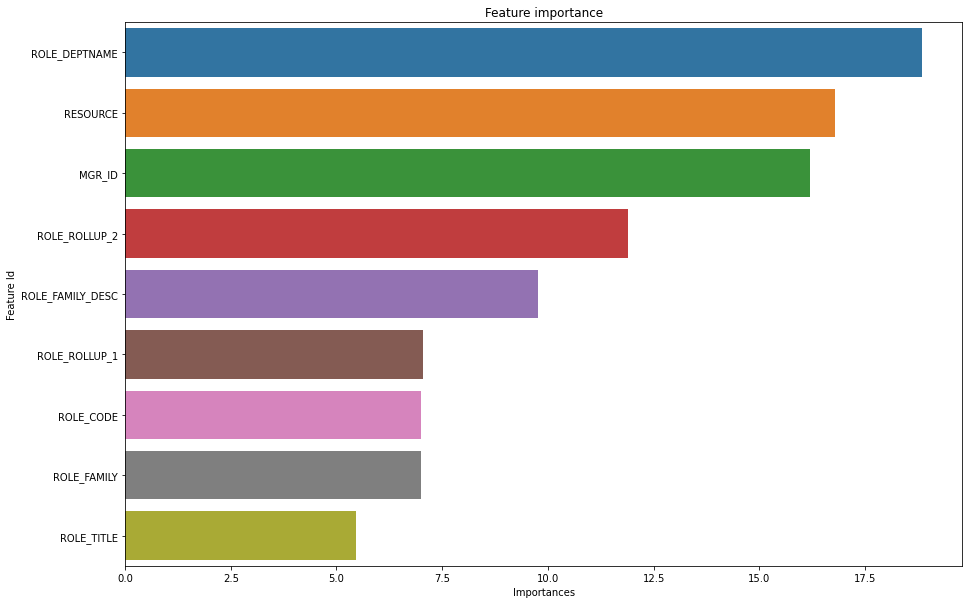

In [59]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Importances", y="Feature Id", data=feature_imp)
plt.title('Feature importance')

In [65]:
#Predicting the unseen dataset X_test
pred = catboost_model1.predict(X_valid)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

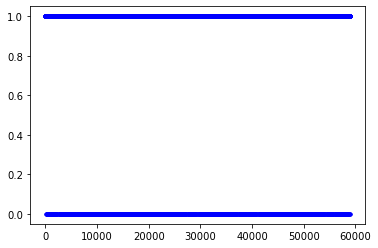

In [70]:
plt.plot(pred, '.', color='blue')

In [66]:
catboost_model1.score(X_test, y_test)

0.9537686908758011

Performance of the catboost model is better on the test set with 95% accuracy. 